# Lab 8: Define and Solve an ML Problem of Your Choosing

In [68]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [69]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename)

# df.head()
column_names = df.columns

# If you want them as a list
column_names_list = df.columns.tolist()

print(column_names_list)

['name', 'description', 'neighborhood_overview', 'host_name', 'host_location', 'host_about', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'c

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

##### Part 2 Answers
1. I am using an Airbnb listings dataset that contains information about listings, hosts, prices, reviews, and availability in a specific region or city. The dataset includes columns such as price, room_type, host_is_superhost, number_of_reviews, and many more.

2. I will be predicting whether a host is a superhost. Label (target variable): host_is_superhost.

3. Supervised learning – because we have labeled data (host_is_superhost)

    Classification problem – we are predicting a category

    Binary classification – only two possible labels: t or f
    
4. Initial features (can be adjusted after exploration and cleaning):

    host_response_rate

    host_acceptance_rate

    host_about

    host_listings_count

    host_total_listings_count

    host_has_profile_pic

    host_identity_verified

    number_of_reviews

    review_scores_rating

    reviews_per_month

    room_type

    price

    I would likely drop columns like name, description, host_name, etc., since they are either text-heavy or have high cardinality and may not directly contribute to the prediction task.
    
5. Trust and safety: Superhosts are often more responsive and reliable, which increases customer satisfaction and repeat bookings.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [70]:
df.info()  # data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28022 entries, 0 to 28021
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          28017 non-null  object 
 1   description                                   27452 non-null  object 
 2   neighborhood_overview                         18206 non-null  object 
 3   host_name                                     28022 non-null  object 
 4   host_location                                 27962 non-null  object 
 5   host_about                                    17077 non-null  object 
 6   host_response_rate                            16179 non-null  float64
 7   host_acceptance_rate                          16909 non-null  float64
 8   host_is_superhost                             28022 non-null  bool   
 9   host_listings_count                           28022 non-null 

In [71]:
df.describe()  # summary statistics for numerical features

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
count,16179.000000,16909.000000,28022.000000,28022.000000,28022.000000,28022.000000,25104.000000,26668.000000,28022.000000,28022.000000,...,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000
mean,0.906901,0.791953,14.554778,14.554778,2.874491,1.142174,1.329708,1.629556,154.228749,18.689387,...,4.814300,4.808041,4.750393,4.647670,9.581900,5.562986,3.902077,0.048283,1.758325,5.169510
std,0.227282,0.276732,120.721287,120.721287,1.860251,0.421132,0.700726,1.097104,140.816605,25.569151,...,0.438603,0.464585,0.415717,0.518023,32.227523,26.121426,17.972386,0.442459,4.446143,2.028497
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,29.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000,1.000000
25%,0.940000,0.680000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,70.000000,2.000000,...,4.810000,4.810000,4.670000,4.550000,1.000000,0.000000,0.000000,0.000000,0.130000,4.000000
50%,1.000000,0.910000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,115.000000,30.000000,...,4.960000,4.970000,4.880000,4.780000,1.000000,1.000000,0.000000,0.000000,0.510000,5.000000
75%,1.000000,1.000000,3.000000,3.000000,4.000000,1.000000,1.000000,2.000000,180.000000,30.000000,...,5.000000,5.000000,5.000000,5.000000,3.000000,1.000000,1.000000,0.000000,1.830000,7.000000
max,1.000000,1.000000,3387.000000,3387.000000,16.000000,8.000000,12.000000,21.000000,1000.000000,1250.000000,...,5.000000,5.000000,5.000000,5.000000,421.000000,308.000000,359.000000,8.000000,141.000000,13.000000


In [72]:
df.dtypes  # data types of all columns

name                                             object
description                                      object
neighborhood_overview                            object
host_name                                        object
host_location                                    object
host_about                                       object
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        

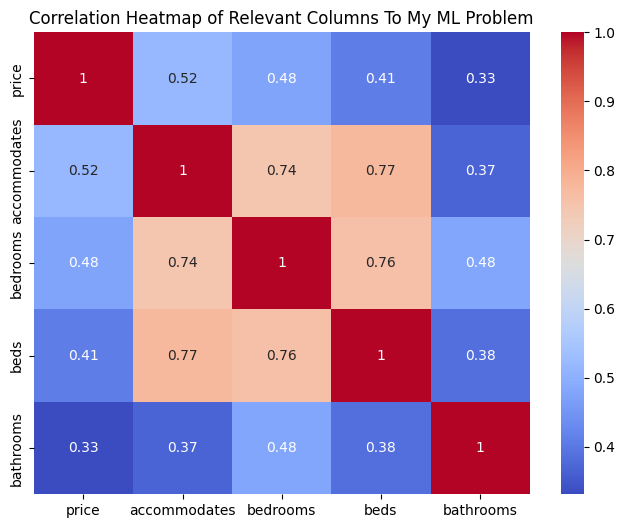

In [73]:
# select numeric columns only
numeric_df = df.select_dtypes(include=['number'])

# calculate absolute correlation of each column with 'price'
correlations = numeric_df.corr()['price'].abs().sort_values(ascending=False)

# choose columns with correlation > 0.3 (adjust threshold as needed)
relevant_cols = correlations[correlations > 0.3].index.tolist()

# ensure 'price' is included
if 'price' not in relevant_cols:
    relevant_cols.append('price')

# subset the dataframe to these relevant columns
relevant_numeric_df = numeric_df[relevant_cols]

# plot heatmap of correlations among relevant columns
plt.figure(figsize=(8, 6))
sns.heatmap(relevant_numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Relevant Columns To My ML Problem")
plt.show()


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

##### Part 4 Answer

To complete my machine learning project, I plan to focus on predicting Airbnb listing prices. After exploring the dataset, I removed features that were mostly text, had too many missing values, or weren’t useful for prediction, such as the listing name, description, host bio, and amenities. I kept features that are more likely to affect price, including room type, location, number of bedrooms and beds, availability, host ratings, and review scores.

To prepare the data, I will fill in missing values with averages, convert yes/no values to 1s and 0s, and one-hot encode categorical features like room type. I will also remove listings with extremely high prices that could skew the model and scale the numeric data to keep all features on a similar range.

For the model, I will start with linear regression as a simple baseline and try a random forest model to capture more complex patterns. I’ll split the data into training and testing sets, train the models, and compare how well they predict prices. I’ll use metrics like mean absolute error and R² score to evaluate them. If needed, I’ll try tuning the better model to improve its accuracy. This plan helps me keep the process simple while making sure I build a model that works well on new Airbnb listings.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [75]:
# drop columns that are mostly text or not useful
cols_to_drop = ['name', 'description', 'neighborhood_overview', 'host_about', 
                'host_name', 'host_location', 'amenities', 'n_host_verifications']
df.drop(columns=cols_to_drop, inplace=True)

In [76]:
# fill numeric columns with mean
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [77]:
binary_cols = ['host_is_superhost', 'host_has_profile_pic', 
               'host_identity_verified', 'instant_bookable', 'has_availability']

for col in binary_cols:
    X_train[col] = X_train[col].fillna(0)
    X_test[col] = X_test[col].fillna(0)

In [78]:
# one-hot encode categorical variables
df = pd.get_dummies(df, columns=['room_type', 'neighbourhood_group_cleansed'], drop_first=True)

In [79]:
# remove listings with price above 99th percentile
upper_limit = df['price'].quantile(0.99)
df = df[df['price'] < upper_limit]

In [80]:
# Select numeric features for scaling
features_to_scale = ['accommodates', 'bedrooms', 'beds', 'availability_30', 
                     'availability_60', 'availability_90', 'availability_365',
                     'number_of_reviews', 'reviews_per_month', 
                     'review_scores_rating', 'review_scores_cleanliness', 
                     'review_scores_communication', 'review_scores_location', 
                     'review_scores_value', 'host_listings_count']

scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [81]:
# split data into features and label
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
# See which columns still have missing values
X_train.isnull().sum().sort_values(ascending=False).head(10)


host_response_rate                0
calculated_host_listings_count    0
number_of_reviews_ltm             0
number_of_reviews_l30d            0
review_scores_rating              0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_communication       0
review_scores_location            0
review_scores_value               0
dtype: int64

In [83]:
imputer = SimpleImputer(strategy='most_frequent')  # or 'mean' for numeric
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

In [84]:
# linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))
print("R²:", r2_score(y_test, y_pred_lr))

Linear Regression:
MAE: 53.746033059352605
RMSE: 82.0592960942036
R²: 0.4708452736433705


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [85]:
# random forest regressor
param_grid = {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid.fit(X_train_imputed, y_train)
print("Best parameters:", grid.best_params_)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Regressor:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("R²:", r2_score(y_test, y_pred_rf))

Best parameters: {'max_depth': 20, 'n_estimators': 100}
Random Forest Regressor:
MAE: 42.72858782666171
RMSE: 69.5261754617951
R²: 0.6201398064040345


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


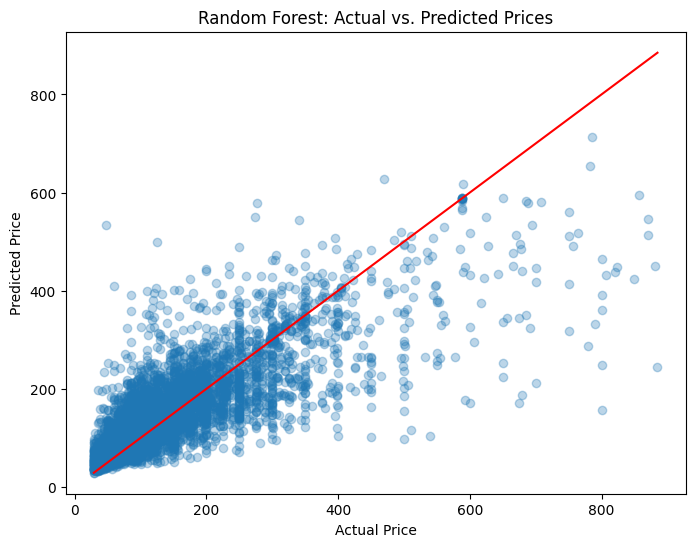

In [86]:
# visualize predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Actual vs. Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

##### Findings

The scatterplot shows that the Random Forest model generally captures the trend between actual and predicted Airbnb listing prices. Most of the data points follow a diagonal pattern, indicating that as actual prices increase, the predicted prices also tend to rise. However, the majority of the points lie below the red line, which means the model often underestimates the true price. This issue is especially noticeable for listings with higher prices, where the predictions fall significantly short of the actual values.

The model performs better for lower to mid-range prices (below around $200–300), where predictions are more accurate and closely follow the red line. For more expensive listings, the predictions become scattered and less reliable. This suggests that the model might struggle with rare or luxury listings, possibly due to limited training data in that range. To improve accuracy, especially for higher prices, further steps like outlier treatment, feature engineering, or transforming the price variable (e.g. using a log scale) could be helpful.